In [91]:
import pandas as pd
import datetime as dt
import pandasql as ps
import os
import zipfile as zp
from datetime import datetime
import plotly.express as px
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt

DIR=r'C:\Users\anuj\Downloads'
ZIp='archive (4).zip'

os.chdir(DIR)
zf = zp.ZipFile(f'{ZIp}')

dfs={}
for name in zf.namelist():
    df_name= name.replace('.csv','')
    dfs[df_name]=pd.read_csv(zf.open(name,mode='r'),encoding='latin')

df1=dfs['ma_lga_12345']
df2=dfs['raw_sales']
df1.columns=df1.columns.str.replace(' ','_')
df2.columns=df2.columns.str.replace(' ','_')

#df1[df1.duplicated()]## Check duplicates
#df2[df2.duplicated()]## Check duplicates
#df2.info()
#df2.isnull().values.any() ########Check NUlls
#df1.isnull().isnull().sum() ########Check NUlls by each column
df2['datesold']= df2['datesold'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df1['saledate']= df1['saledate'].apply(lambda x: datetime.strptime(x,'%d/%m/%Y'))
df2['postcode']= '0'+ df2['postcode'].apply(lambda x: str(x))
df2['bedrooms']= df2['bedrooms'].apply(lambda x: str(x))
df1['MA']= df1['MA'].apply(lambda x: str(x))
df1['bedrooms']= df1['bedrooms'].apply(lambda x: str(x))
df2['price']=df2['price'].astype(int)
df2['datesold']=pd.to_datetime(df2['datesold'])
df2['yearsold']=pd.DatetimeIndex(df2['datesold']).year
df2['monthsold']=pd.DatetimeIndex(df2['datesold']).month
df2['yearmonth']=df2['datesold'].dt.strftime('%Y-%m')
merged=ps.sqldf('select * from df2 a left join df1 b on a.propertyType=b.type and a.bedrooms=b.bedrooms and a.datesold=b.saledate')
#del df1,df2
merged['datesold']=pd.to_datetime(merged['datesold'])

os.chdir(r'C:/users/anuj/Downloads')
usdb = pd.read_csv('uszips.csv')

df2 = ps.sqldf('select a.*,b.lat,b.lng from df2 a left join usdb b on a.postcode=b.zip')

In [92]:
df2.head()

,datesold,postcode,price,propertyType,bedrooms,yearsold,monthsold,yearmonth,lat,lng
0,2007-02-07 00:00:00.000000,02607,525000,house,4,2007,2,2007-02,NaN,NaN
1,2007-02-27 00:00:00.000000,02906,290000,house,3,2007,2,2007-02,41.83917,-71.38994
2,2007-03-07 00:00:00.000000,02905,328000,house,3,2007,3,2007-03,41.78722,-71.39886
3,2007-03-09 00:00:00.000000,02905,380000,house,4,2007,3,2007-03,41.78722,-71.39886
4,2007-03-21 00:00:00.000000,02906,310000,house,3,2007,3,2007-03,41.83917,-71.38994


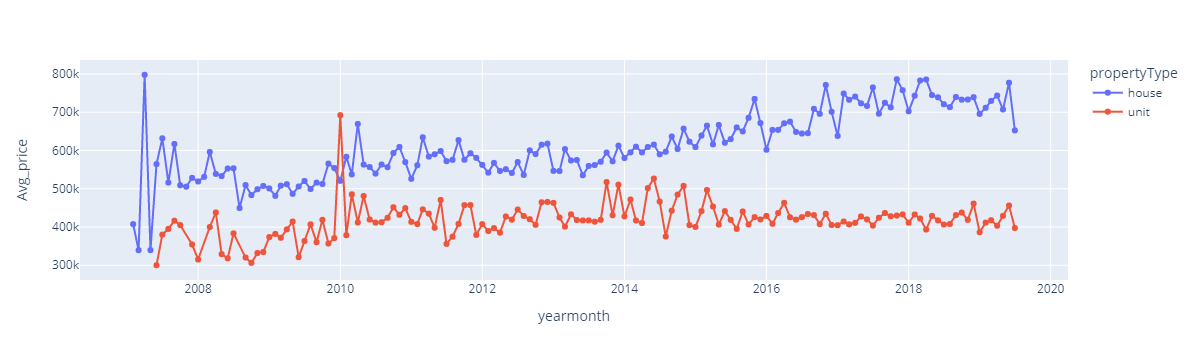

In [104]:
q1=pd.DataFrame(df2.groupby(['yearmonth','propertyType'])['price'].mean()).rename(columns={'price':'Avg_price'}).reset_index()

px.line(q1,x='yearmonth',y='Avg_price',color='propertyType',render_mode='auto',markers=True)

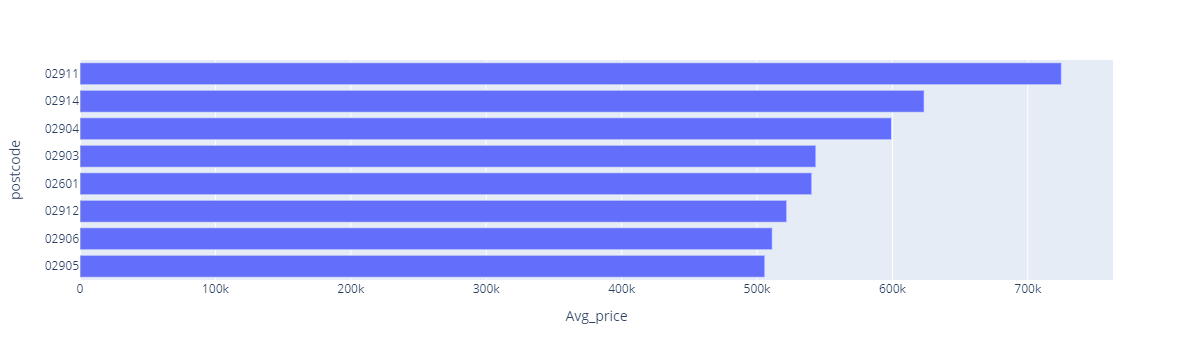

In [84]:
q2=pd.DataFrame(df2.groupby(['postcode','lat','lng'])['price'].mean()).rename(columns={'price':'Avg_price'}).sort_values(by='Avg_price').reset_index()

px.bar(q2,y='postcode',x='Avg_price',orientation='h')

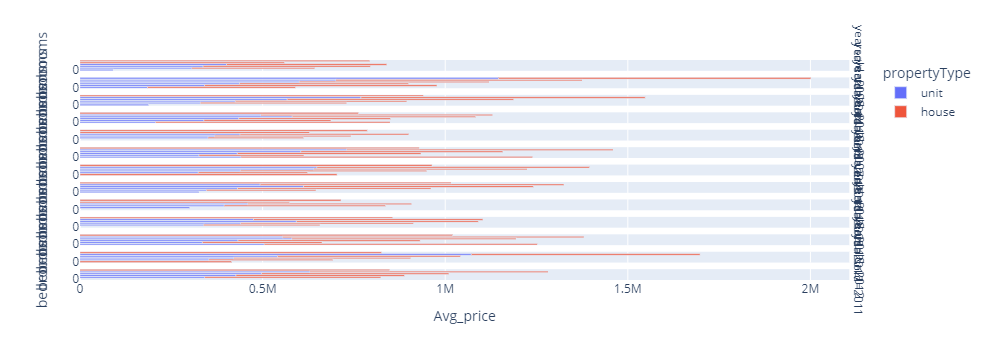

In [133]:
q3=pd.DataFrame(df2.groupby(['bedrooms','propertyType','yearsold'])['price'].mean()).rename(columns={'price':'Avg_price'}).sort_values(by='Avg_price').reset_index()

px.bar(q3,y='bedrooms',x='Avg_price',orientation='h',color='propertyType',facet_row='yearsold',facet_col_wrap=3)

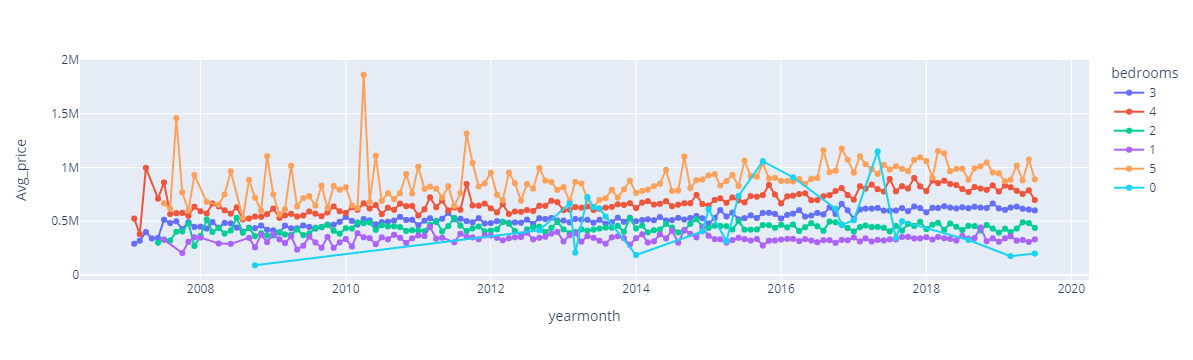

In [106]:
q4=pd.DataFrame(df2.groupby(['yearmonth','bedrooms'])['price'].mean()).rename(columns={'price':'Avg_price'}).reset_index()

px.line(q4,x='yearmonth',y='Avg_price',color='bedrooms',render_mode='auto',markers=True)

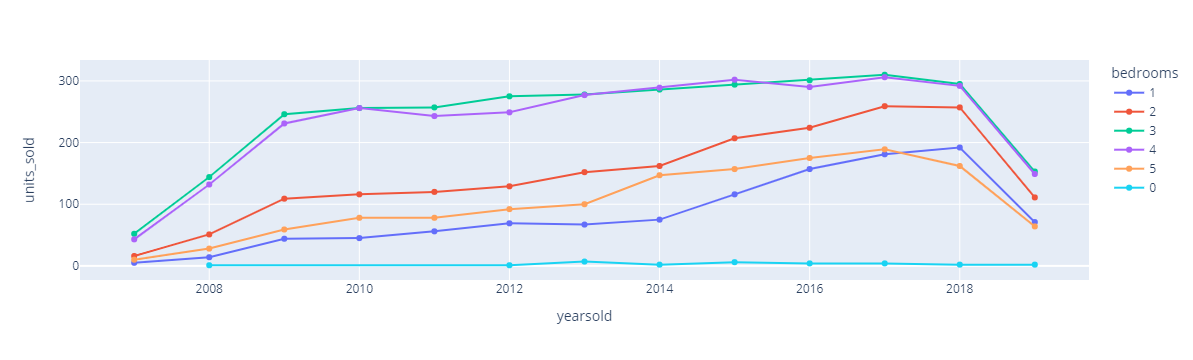

In [113]:
q5=pd.DataFrame(df2.groupby(['yearsold','bedrooms'])['datesold'].nunique()).rename(columns={'datesold':'units_sold'}).reset_index()

px.line(q5,x='yearsold',y='units_sold',color='bedrooms',render_mode='auto',markers=True)

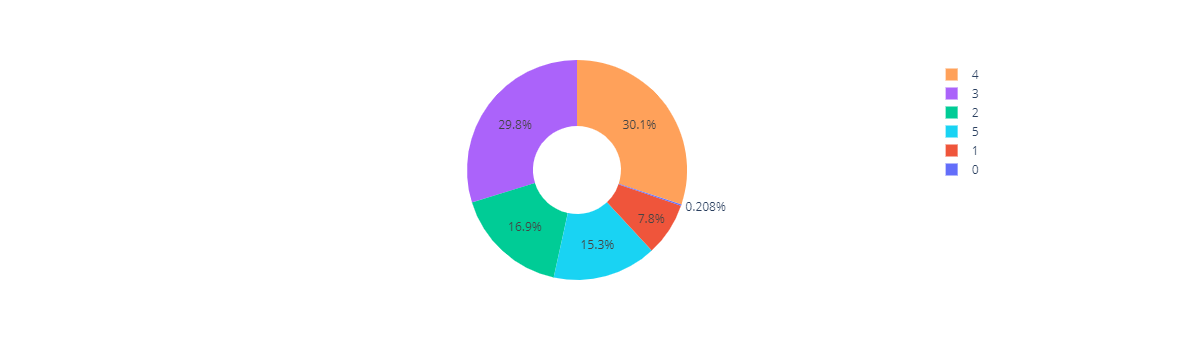

In [124]:
year=2014
q6=pd.DataFrame(df2[df2['yearsold']==int(year)].groupby(['bedrooms'])['datesold'].nunique()).rename(columns={'datesold':'count'}).reset_index()
px.pie(q6,names='bedrooms',values='count',color='bedrooms',hole=0.4)

In [130]:
df2.yearsold.unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019], dtype=int64)